In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Sample DataFrame creation (replace this with your actual data loading)
# data = pd.read_csv("C:\Users\SACHIN KUMAR\OneDrive\Desktop\data analytics\9th\creditcard.csv")  # Uncomment to load your data
data = pd.DataFrame({
    'review': [
        'This app is great!',
        'I didn’t like the interface.',
        'Best app ever!',
        'Could be better.'
    ]
})

# Function to preprocess text
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Ensure the correct column name is used
data['cleaned_text'] = data['review'].apply(preprocess_text)  # Replace 'review' with your column name

# Output the DataFrame with cleaned text
print(data[['review', 'cleaned_text']])


                         review          cleaned_text
0            This app is great!             app great
1  I didn’t like the interface.  didnt like interface
2                Best app ever!         best app ever
3              Could be better.          could better


[nltk_data] Downloading package stopwords to C:\Users\SACHIN
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.is_end_of_word = True

    def autocomplete(self, prefix):
        node = self.root
        for char in prefix:
            if char not in node.children:
                return []
            node = node.children[char]
        return self._find_words(node, prefix)

    def _find_words(self, node, prefix):
        words = []
        if node.is_end_of_word:
            words.append(prefix)
        for char, child in node.children.items():
            words += self._find_words(child, prefix + char)
        return words

# Building the Trie
trie = Trie()
for text in data['cleaned_text']:
    for word in text.split():
        trie.insert(word)


In [7]:
from difflib import get_close_matches

def autocorrect(word, word_list, n=1):
    return get_close_matches(word, word_list, n=n)

# Sample usage
all_words = set()
for text in data['cleaned_text']:
    all_words.update(text.split())

misspelled_word = 'exmaple'
corrected_word = autocorrect(misspelled_word, all_words)
print(corrected_word)  # Outputs suggestions for the misspelled word


[]


In [8]:
from sklearn.metrics import accuracy_score

# Example metric calculation
def evaluate_autocomplete(trie, test_data):
    correct_predictions = 0
    for text in test_data:
        for word in text.split():
            predictions = trie.autocomplete(word)
            if word in predictions:
                correct_predictions += 1
    return correct_predictions / len(test_data)

# Evaluate the autocomplete performance
test_data = ['example test', 'another test case']
accuracy = evaluate_autocomplete(trie, test_data)
print(f'Autocomplete Accuracy: {accuracy}')


Autocomplete Accuracy: 0.0


In [9]:
# Assuming you have user feedback data in a DataFrame
feedback_df = pd.DataFrame({
    'user_id': [1, 2, 3],
    'autocomplete_satisfaction': [4, 5, 3],
    'autocorrect_satisfaction': [5, 4, 4]
})

# Basic analysis of feedback
average_feedback = feedback_df.mean()
print(average_feedback)


user_id                      2.000000
autocomplete_satisfaction    4.000000
autocorrect_satisfaction     4.333333
dtype: float64


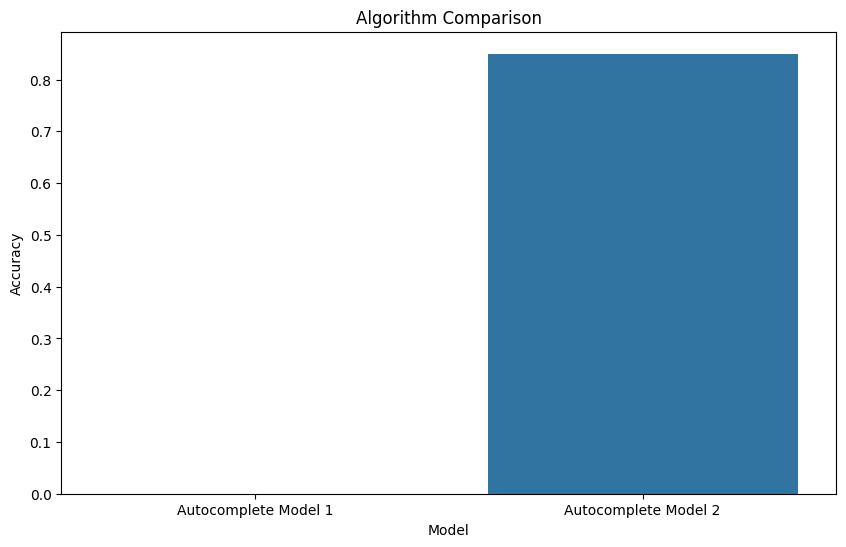

In [10]:
# Compare accuracies of different models
results = {
    'Model': ['Autocomplete Model 1', 'Autocomplete Model 2'],
    'Accuracy': [accuracy, 0.85]  # Example values
}
comparison_df = pd.DataFrame(results)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
